<a href="https://colab.research.google.com/github/macollipal/-challenge3-data-science-LATAM/blob/main/challenge3_data_science_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [2]:
import pandas as pd



# Assuming your CSV file is named 'data.csv' and is in the same directory as the notebook,
# and the separator is ';'. You might need to adjust the file path and separator accordingly.
try:
    data = pd.read_csv('datos_tratados.csv', sep=';')
    data = data.reset_index(drop=True)
    print("✅ Datos cargados:", len(data), "registros")

    display(data.head(5))

except FileNotFoundError:
    print("❌ Error: El archivo 'data.csv' no se encontró.")
except Exception as e:
    print("❌ Ocurrió un error al cargar el archivo:", e)

✅ Datos cargados: 7043 registros


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,account_charges_daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,"65,6","593,3","2,19"
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,"59,9","542,4","2,0"
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,"73,9","280,85","2,46"
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,"98,0","1237,85","3,27"
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,"83,9","267,4","2,8"


#🔧 Transformación

##  Customer tenure

In [22]:
"""# En clases no lo consideraron
# Create tenure ranges
bins = [0, 12, 24, 36, 48, 60, data['customer_tenure'].max()]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61+']

data['tenure_range'] = pd.cut(data['customer_tenure'], bins=bins, labels=labels, right=True)

data['tenure_range'] = data['tenure_range'].astype('object')

print("✅ Rangos de customer_tenure generados")
display(data[['customer_tenure', 'tenure_range']].head())"""



'# En clases no lo consideraron\n# Create tenure ranges\nbins = [0, 12, 24, 36, 48, 60, data[\'customer_tenure\'].max()]\nlabels = [\'0-12\', \'13-24\', \'25-36\', \'37-48\', \'49-60\', \'61+\']\n\ndata[\'tenure_range\'] = pd.cut(data[\'customer_tenure\'], bins=bins, labels=labels, right=True)\n\ndata[\'tenure_range\'] = data[\'tenure_range\'].astype(\'object\')\n\nprint("✅ Rangos de customer_tenure generados")\ndisplay(data[[\'customer_tenure\', \'tenure_range\']].head())'

In [23]:
display(data.head())

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,account_charges_daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,"65,6","593,3","2,19"
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,"59,9","542,4","2,0"
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,"73,9","280,85","2,46"
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,"98,0","1237,85","3,27"
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,"83,9","267,4","2,8"


In [24]:
"""# Drop the original customer_tenure column(permanencia)
data = data.drop('customer_tenure', axis=1)

print("✅ Columna customer_tenure eliminada")
display(data.head())"""

'# Drop the original customer_tenure column(permanencia)\ndata = data.drop(\'customer_tenure\', axis=1)\n\nprint("✅ Columna customer_tenure eliminada")\ndisplay(data.head())'

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customerid                 7043 non-null   object
 1   churn                      7043 non-null   int64 
 2   customer_gender            7043 non-null   object
 3   customer_seniorcitizen     7043 non-null   int64 
 4   customer_partner           7043 non-null   int64 
 5   customer_dependents        7043 non-null   int64 
 6   customer_tenure            7043 non-null   int64 
 7   phone_phoneservice         7043 non-null   int64 
 8   phone_multiplelines        7043 non-null   int64 
 9   internet_internetservice   7043 non-null   object
 10  internet_onlinesecurity    7043 non-null   int64 
 11  internet_onlinebackup      7043 non-null   int64 
 12  internet_deviceprotection  7043 non-null   int64 
 13  internet_techsupport       7043 non-null   int64 
 14  internet

#### convertir columnas en numericas

In [26]:
import numpy as np

# Convert specified columns to numeric, coercing errors
columns_to_convert = ['account_charges_monthly', 'account_charges_total', 'account_charges_daily']
for col in columns_to_convert:
    data[col] = (
        data[col].astype(str)              # convertir todo a string
        #.str.replace(r'[^0-9.-]', '', regex=True)  # quitar todo lo que no sea número, punto o guion
        .str.replace(',', '.', regex=False)  # cambiar coma por punto
        .replace('', np.nan)               # reemplazar cadenas vacías por NaN
    )
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in the converted columns
#data.dropna(subset=columns_to_convert, inplace=True)

print("✅ Columnas convertidas a numérico y registros inválidos eliminados")

✅ Columnas convertidas a numérico y registros inválidos eliminados


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   int64  
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   int64  
 11  internet_onlinebackup      7043 non-null   int64  
 12  internet_deviceprotection  7043 non-null   int64  
 13  internet_techsupport       7043 non-null   int64

## Eliminar columnas irrelevantes

In [1]:
# Create a copy of the data DataFrame
data_paso = data.copy()

# Drop the customerid column from data_paso
data_paso = data_paso.drop('customerid', axis=1)

print("✅ DataFrame 'data_paso' creado y columna 'customerid' eliminada")
display(data_paso.head())

NameError: name 'data' is not defined

##Encoding

In [29]:
# Select categorical columns to encode
categorical_cols = data_paso.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding
data_paso_encoded = pd.get_dummies(data_paso, columns=categorical_cols, dummy_na=False)

print("✅ Variables categóricas codificadas")
display(data_paso_encoded.head())

✅ Variables categóricas codificadas


,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,...,internet_internetservice_DSL,internet_internetservice_Fiber optic,internet_internetservice_No,account_contract_Month-to-month,account_contract_One year,account_contract_Two year,account_paymentmethod_Bank transfer (automatic),account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,True,False,False,False,True,False,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,False,True,False,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,False,True,False,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [30]:
# Select boolean columns
boolean_cols = data_paso_encoded.select_dtypes(include='bool').columns

#Dado que tu objetivo final es entrenar modelos de clasificación, lo más recomendable es usar 0 y 1.
# Convert boolean columns to int64 (True=1, False=0)
data_paso_encoded[boolean_cols] = data_paso_encoded[boolean_cols].astype('int64')

print("✅ Columnas booleanas convertidas a int64")
display(data_paso_encoded.head())

✅ Columnas booleanas convertidas a int64


,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,...,internet_internetservice_DSL,internet_internetservice_Fiber optic,internet_internetservice_No,account_contract_Month-to-month,account_contract_One year,account_contract_Two year,account_paymentmethod_Bank transfer (automatic),account_paymentmethod_Credit card (automatic),account_paymentmethod_Electronic check,account_paymentmethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [31]:
"""# Guardar CSV (opcional)
data_paso_encoded.to_csv('datos_a_revisar.csv', index=False, decimal=',',sep=';', mode='w')
#print(f"\n💾 Archivo guardado: datos_normalizados.csv")

# Para descargar en Colab
from google.colab import files
files.download('datos_a_revisar.csv')"""


'# Guardar CSV (opcional)\ndata_paso_encoded.to_csv(\'datos_a_revisar.csv\', index=False, decimal=\',\',sep=\';\', mode=\'w\')\n#print(f"\n💾 Archivo guardado: datos_normalizados.csv")\n\n# Para descargar en Colab\nfrom google.colab import files\nfiles.download(\'datos_a_revisar.csv\')'

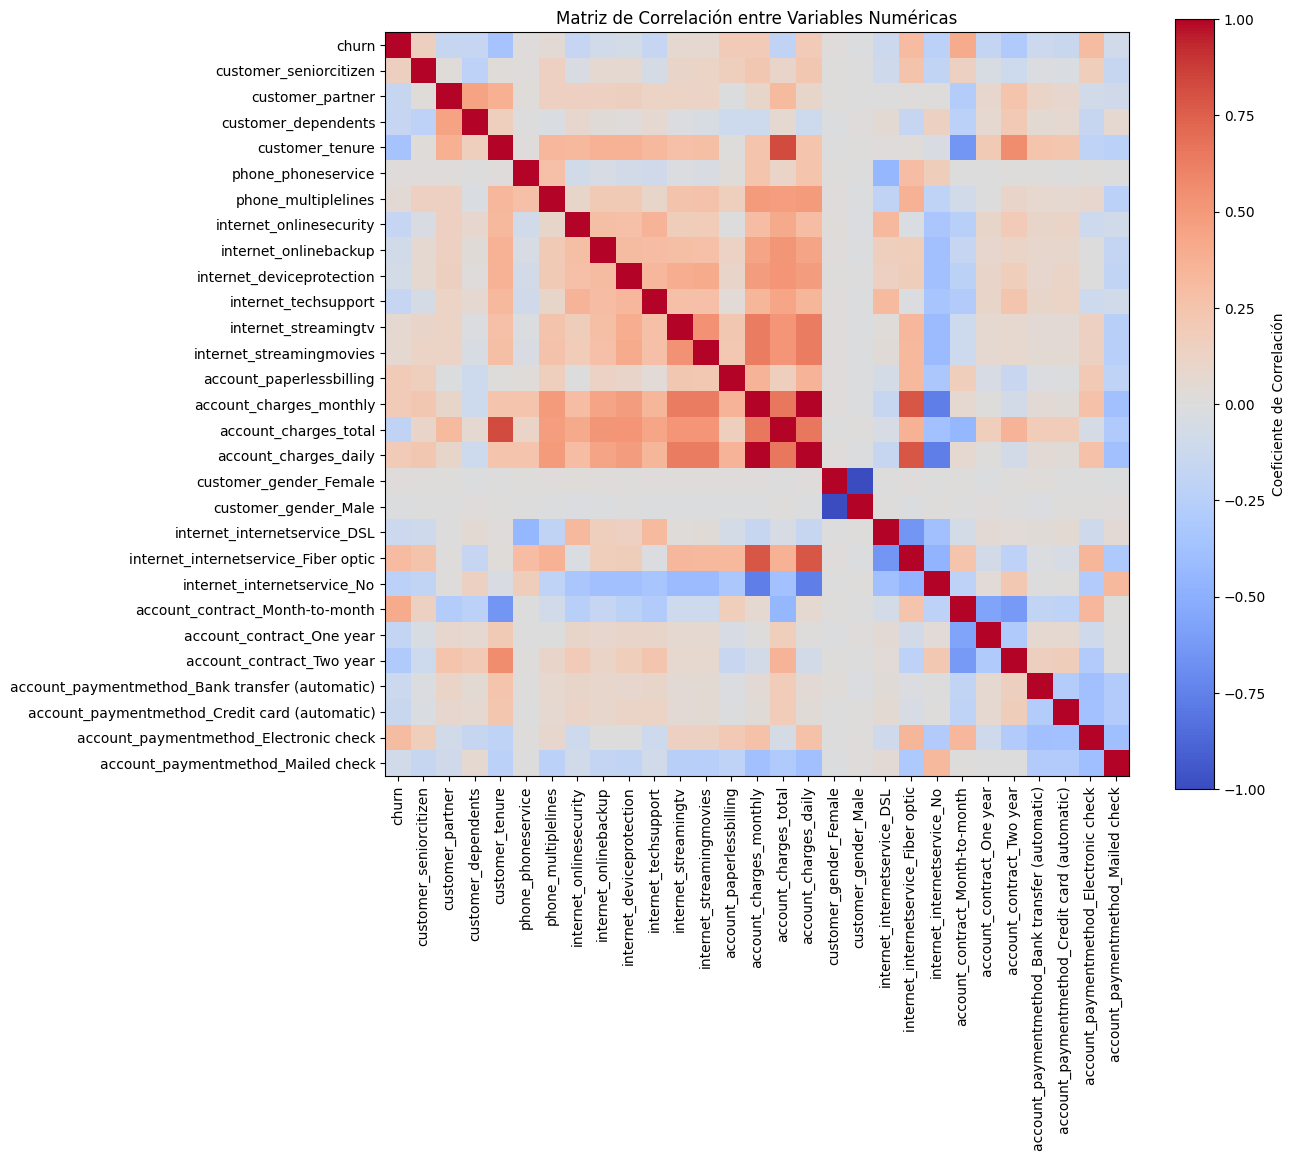


📌 Correlación con churn:
churn                                              1.000000
account_contract_Month-to-month                    0.405103
internet_internetservice_Fiber optic               0.308020
account_paymentmethod_Electronic check             0.301919
account_charges_daily                              0.193412
account_charges_monthly                            0.193356
account_paperlessbilling                           0.191825
customer_seniorcitizen                             0.150889
internet_streamingtv                               0.063228
internet_streamingmovies                           0.061382
phone_multiplelines                                0.040102
phone_phoneservice                                 0.011942
customer_gender_Female                             0.008612
customer_gender_Male                              -0.008612
internet_deviceprotection                         -0.066160
internet_onlinebackup                             -0.082255
account_paymen

In [32]:
# ===============================================
# 📌 Matriz de Correlación + Top 10 Variables con churn
# ===============================================

import pandas as pd
import matplotlib.pyplot as plt

# Ruta de tu archivo (ajusta si está en tu Drive o en Colab)
#file_path = '/content/datos_a_revisar_(10).csv'

# Cargar el CSV con el separador correcto
df = data_paso_encoded #pd.read_csv(file_path, sep=";")



# Limpiar y convertir a numéricas las columnas con cargos
cols_to_fix = ['account_charges_monthly', 'account_charges_total', 'account_charges_daily']
for col in cols_to_fix:
    df[col] = df[col].astype(str).str.replace(" ", "").str.replace(",", ".")
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Crear la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualización con mapa de calor
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Coeficiente de Correlación")
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Exportar a CSV (opcional)
correlation_matrix.to_csv('/content/matriz_correlacion.csv')

# Mostrar correlación específica con la variable churn
print("\n📌 Correlación con churn:")
correlaciones_churn = correlation_matrix['churn'].sort_values(ascending=False)
print(correlaciones_churn)

# Mostrar las 10 variables más correlacionadas con churn
top_10 = correlaciones_churn.drop('churn').abs().sort_values(ascending=False).head(10)
print("\n🔥 Top 10 variables más correlacionadas con churn:")
print(top_10)



In [33]:
data_paso_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   churn                                            7043 non-null   int64  
 1   customer_seniorcitizen                           7043 non-null   int64  
 2   customer_partner                                 7043 non-null   int64  
 3   customer_dependents                              7043 non-null   int64  
 4   customer_tenure                                  7043 non-null   int64  
 5   phone_phoneservice                               7043 non-null   int64  
 6   phone_multiplelines                              7043 non-null   int64  
 7   internet_onlinesecurity                          7043 non-null   int64  
 8   internet_onlinebackup                            7043 non-null   int64  
 9   internet_deviceprotection     

In [34]:
# Calculate the proportion of churned vs active customers
churn_counts = data_paso_encoded['churn'].value_counts(normalize=True)

print("✅ Proporción de clientes que cancelaron (0) vs permanecieron activos (1):")
display(churn_counts)

if churn_counts[0] < 0.3: # Assuming 30% is a reasonable threshold for imbalance
    print("\n⚠️ Existe un desbalance significativo entre las clases.")
else:
    print("\nℹ️ No parece haber un desbalance significativo entre las clases.")

✅ Proporción de clientes que cancelaron (0) vs permanecieron activos (1):


,proportion
churn,
0,0.73463
1,0.26537



ℹ️ No parece haber un desbalance significativo entre las clases.


##Balanceo

In [35]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Separate features (X) and target (y)
X = data_paso_encoded.drop('churn', axis=1)
y = data_paso_encoded['churn']

# Check for and drop rows with NaN values in X
if X.isnull().sum().sum() > 0:
    print("⚠️ Eliminando filas con valores NaN en X antes de aplicar SMOTE.")
    # Combine X and y temporarily to ensure consistent dropping of rows
    temp_df = pd.concat([X, y], axis=1)
    temp_df.dropna(inplace=True)
    X = temp_df.drop('churn', axis=1)
    y = temp_df['churn']
    print(f"✅ {len(X)} filas restantes después de eliminar NaNs.")


# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

print("✅ Dataset balanceado usando SMOTE")
print("Shape of original X:", X.shape)
print("Shape of resampled X:", X_resampled.shape)
print("Value counts of original y:\n", y.value_counts())
print("Value counts of resampled y:\n", y_resampled.value_counts())

⚠️ Eliminando filas con valores NaN en X antes de aplicar SMOTE.
✅ 7032 filas restantes después de eliminar NaNs.
✅ Dataset balanceado usando SMOTE
Shape of original X: (7032, 28)
Shape of resampled X: (10326, 28)
Value counts of original y:
 churn
0    5163
1    1869
Name: count, dtype: int64
Value counts of resampled y:
 churn
0    5163
1    5163
Name: count, dtype: int64


In [36]:

"""# Guardar CSV (opcional)
data_paso_encoded.to_csv('datos_a_revisar.csv', index=False, decimal=',',sep=';', mode='w')
#print(f"\n💾 Archivo guardado: datos_normalizados.csv")

# Para descargar en Colab
from google.colab import files
files.download('datos_a_revisar.csv')"""



'# Guardar CSV (opcional)\ndata_paso_encoded.to_csv(\'datos_a_revisar.csv\', index=False, decimal=\',\',sep=\';\', mode=\'w\')\n#print(f"\n💾 Archivo guardado: datos_normalizados.csv")\n\n# Para descargar en Colab\nfrom google.colab import files\nfiles.download(\'datos_a_revisar.csv\')'

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Separar variables y target

X = data_paso_encoded.drop('churn', axis=1)
y = data_paso_encoded['churn']

# Check for and drop rows with NaN values in X
if X.isnull().sum().sum() > 0:
    print("⚠️ Eliminando filas con valores NaN en X antes de aplicar .")
    # Combine X and y temporarily to ensure consistent dropping of rows
    temp_df = pd.concat([X, y], axis=1)
    temp_df.dropna(inplace=True)
    X = temp_df.drop('churn', axis=1)
    y = temp_df['churn']
    print(f"✅ {len(X)} filas restantes después de eliminar NaNs.")

# Dividir en train y test (con estratificación para mantener proporciones de churn)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Datos divididos en train y test")

# Escalado para modelos sensibles a la escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Dataset normalizado creado")

# Guardar datasets en diccionarios para facilitar uso
datasets = {
    "árboles": {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    },
    "distancia": {
        "X_train": X_train_scaled,
        "X_test": X_test_scaled,
        "y_train": y_train,
        "y_test": y_test
    }
}

print("🔹 Usa datasets['árboles'] para RandomForest, DecisionTree, XGBoost")
print("🔹 Usa datasets['distancia'] para KNN, SVM, Regresión Logística, Redes Neuronales")


⚠️ Eliminando filas con valores NaN en X antes de aplicar .
✅ 7032 filas restantes después de eliminar NaNs.
✅ Datos divididos en train y test
✅ Dataset normalizado creado
🔹 Usa datasets['árboles'] para RandomForest, DecisionTree, XGBoost
🔹 Usa datasets['distancia'] para KNN, SVM, Regresión Logística, Redes Neuronales


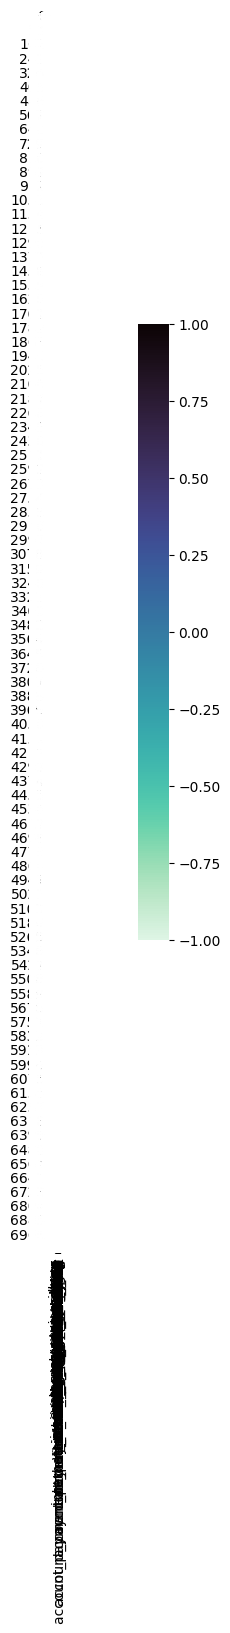

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
corr  = data_paso_encoded
# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True


fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5}, cmap='mako_r')
plt.show()



In [39]:
# Ejemplo con RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(datasets["árboles"]["X_train"], datasets["árboles"]["y_train"])
y_pred = model.predict(datasets["árboles"]["X_test"])

# Ejemplo con Regresión Logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(datasets["distancia"]["X_train"], datasets["distancia"]["y_train"])
y_pred = model.predict(datasets["distancia"]["X_test"])


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:29:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Resultados comparativos:


,Modelo,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.719972,0.473118,0.470588,0.471850
1,Random Forest,0.787491,0.635379,0.470588,0.540707
2,XGBoost,0.785359,0.612500,0.524064,0.564841
3,Logistic Regression,0.800995,0.655629,0.529412,0.585799
4,KNN,0.751955,0.535211,0.508021,0.521262
5,SVM,0.793888,0.648936,0.489305,0.557927


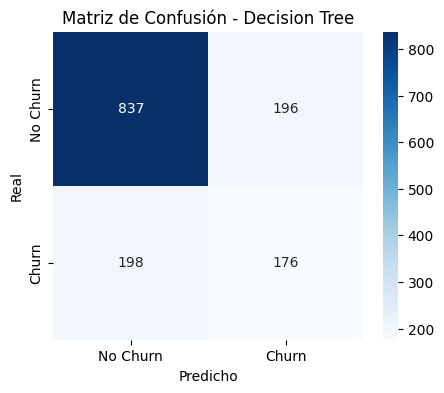

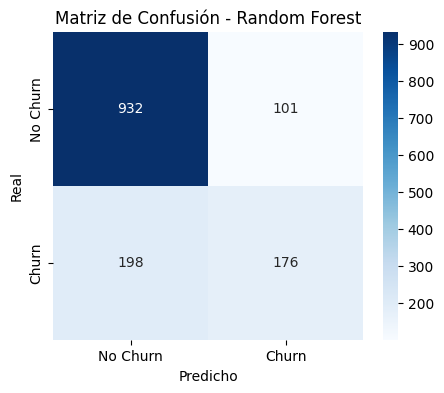

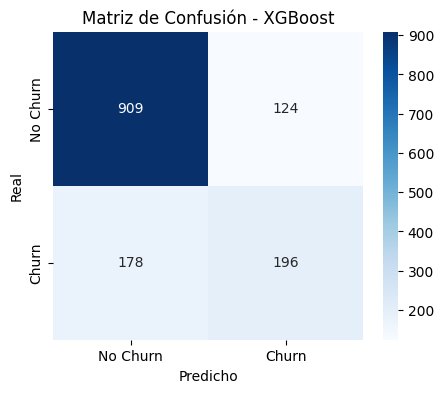

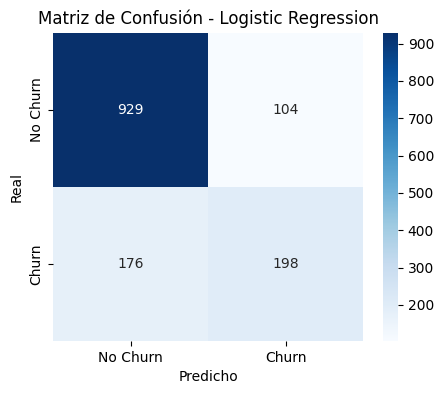

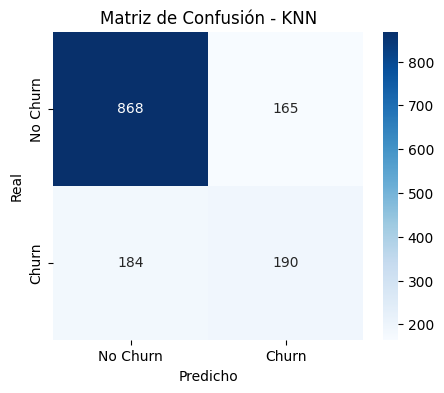

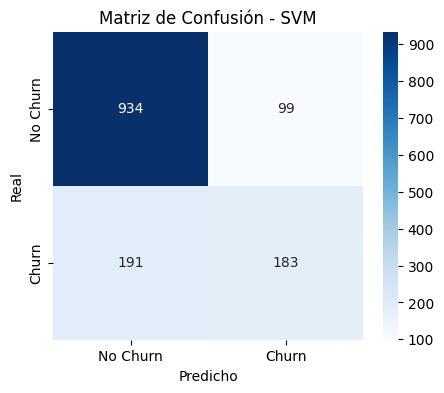

In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definir modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Modelos basados en árboles (no necesitan normalización)
modelos_arboles = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

# Modelos basados en distancia/gradiente (sí necesitan normalización)
modelos_distancia = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42)
}

resultados = []

# Entrenar modelos de árboles
for nombre, modelo in modelos_arboles.items():
    modelo.fit(datasets["árboles"]["X_train"], datasets["árboles"]["y_train"])
    y_pred = modelo.predict(datasets["árboles"]["X_test"])
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(datasets["árboles"]["y_test"], y_pred),
        "Precision": precision_score(datasets["árboles"]["y_test"], y_pred),
        "Recall": recall_score(datasets["árboles"]["y_test"], y_pred),
        "F1-Score": f1_score(datasets["árboles"]["y_test"], y_pred)
    })

# Entrenar modelos de distancia
for nombre, modelo in modelos_distancia.items():
    modelo.fit(datasets["distancia"]["X_train"], datasets["distancia"]["y_train"])
    y_pred = modelo.predict(datasets["distancia"]["X_test"])
    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(datasets["distancia"]["y_test"], y_pred),
        "Precision": precision_score(datasets["distancia"]["y_test"], y_pred),
        "Recall": recall_score(datasets["distancia"]["y_test"], y_pred),
        "F1-Score": f1_score(datasets["distancia"]["y_test"], y_pred)
    })

# Mostrar tabla comparativa
df_resultados = pd.DataFrame(resultados)
print("📊 Resultados comparativos:")
display(df_resultados)

# Graficar la matriz de confusión de cada modelo
for nombre, modelo in {**modelos_arboles, **modelos_distancia}.items():
    if nombre in modelos_arboles:
        X_test, y_test = datasets["árboles"]["X_test"], datasets["árboles"]["y_test"]
    else:
        X_test, y_test = datasets["distancia"]["X_test"], datasets["distancia"]["y_test"]

    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicho")
    plt.ylabel("Real")
    plt.show()
